In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as stat

Part a

In [3]:
N=2
D=3

In [4]:
def gen(Number,dimensions):
    start=np.zeros(dimensions)
    holder=np.zeros((2,dimensions))
    for i in range(0,Number):
        store=holder[-1]
        seed=int(time.time())
        for dim in range(0,dimensions):
            # np.random.seed(seed=seed)
            step=np.random.uniform(-0.5,0.5)
            store[dim]+=step
        holder=np.vstack((holder,store))
    return holder[0:-1]



10001


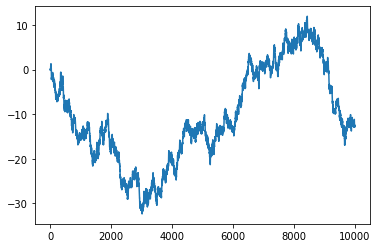

In [5]:
# Generate 10000 points in 1D
y=gen(10000,1)
print(y.size)
# plt.figure(figsize=(9,6),dpi=100)
plt.plot(y)

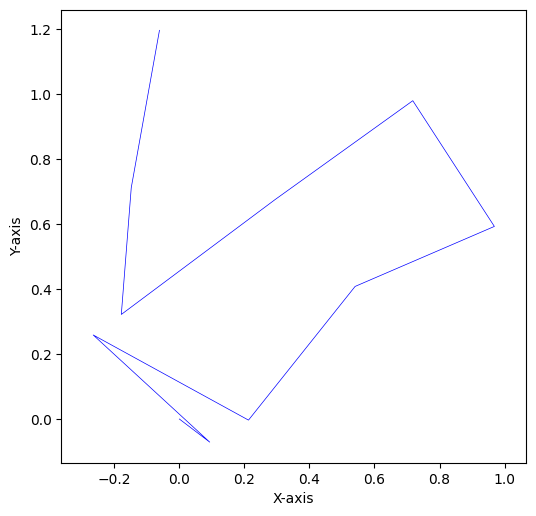

In [6]:
# Generate 10 points in 2D
y=gen(10,2)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(y[:,0],y[:,1], color='blue',linewidth=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

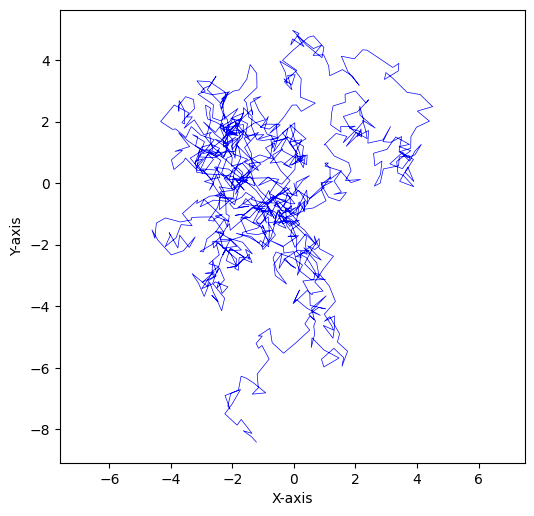

In [7]:
# Generate 10 points in 2D
y=gen(1000,2)
# print(y)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(y[:,0],y[:,1], color='blue',linewidth=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')
plt.show()

In [8]:
# Generate 100000 points in 2D
y=gen(100000,2)
# print(y)
plt.figure(figsize=(9,9),dpi=1000)
plt.plot(y[:,0],y[:,1], color='blue',linewidth=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

Part B

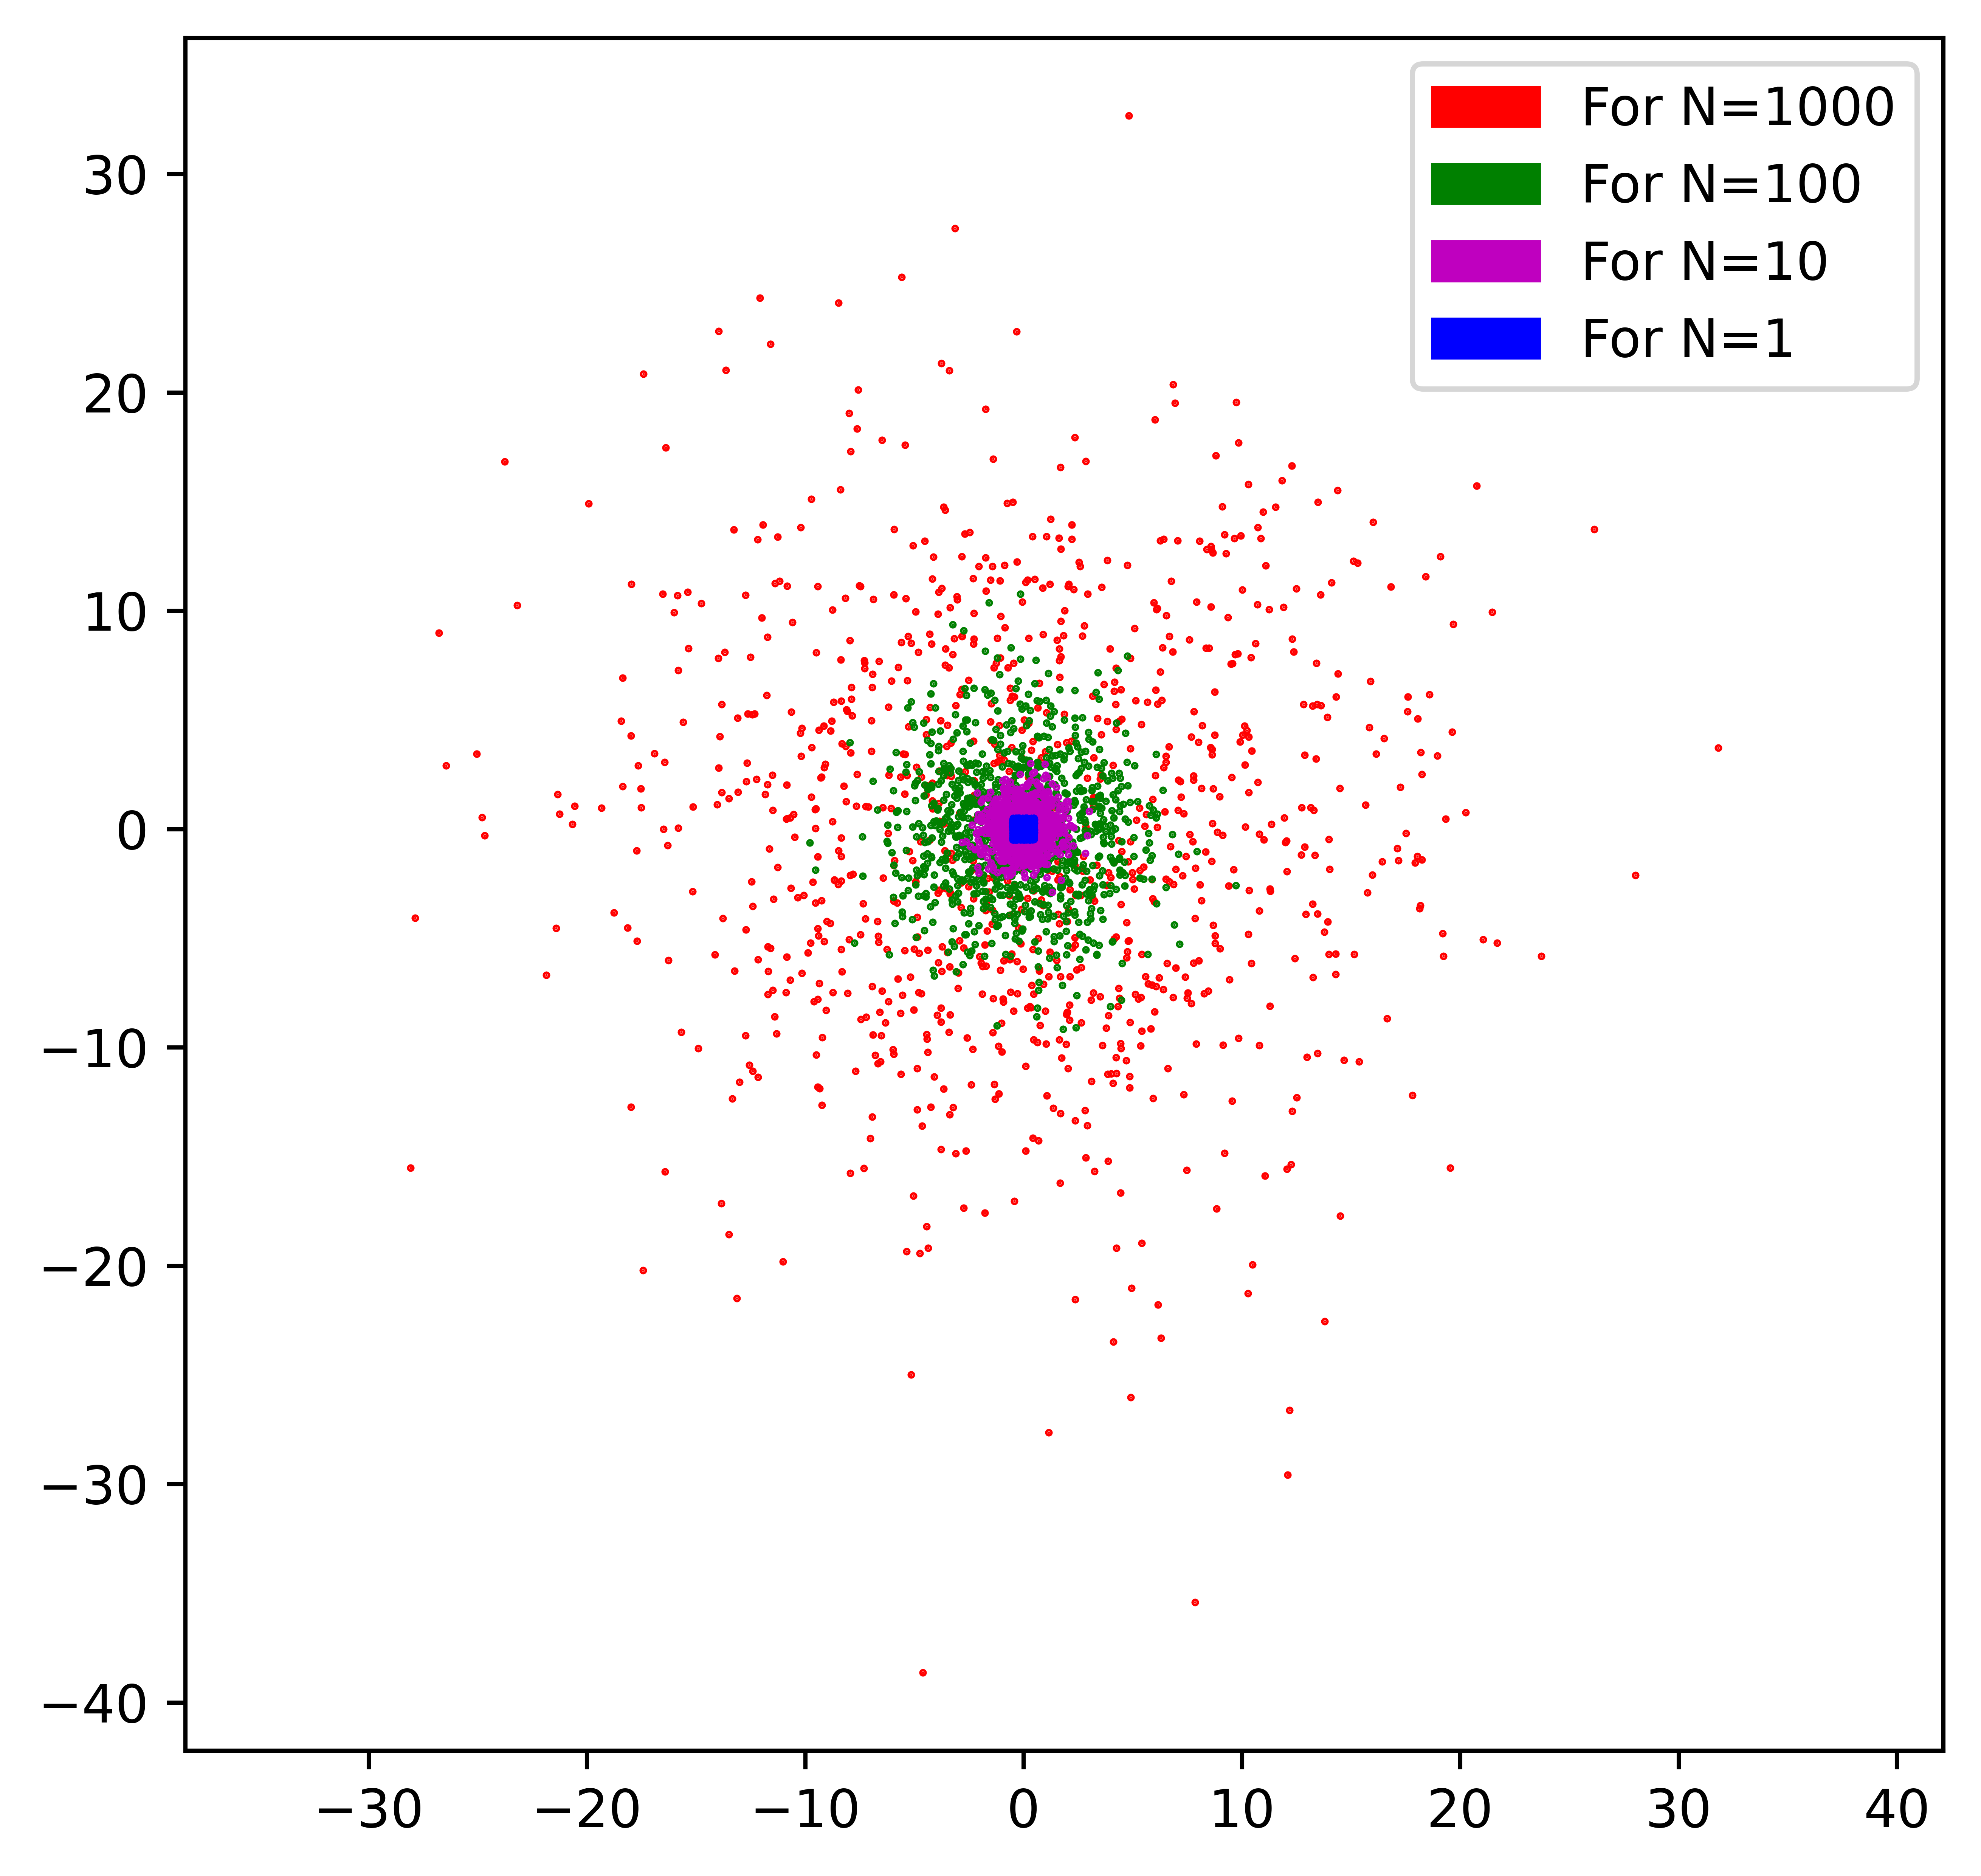

In [35]:
# Generates the end points cluster for various Number of steps
import matplotlib.patches as mpatches
handles=[]
plt.figure(dpi=1000,figsize=(6,6))
plt.axis("equal")
for i in range(1000):
    z=gen(1000,2)
    plt.scatter(z[-1][0],z[-1][1],c='r',s=0.2)
handles.append(mpatches.Patch(color='r', label="For N=1000"))
for i in range(1000):
    z=gen(100,2)
    plt.scatter(z[-1][0],z[-1][1],c='g',s=0.2)
handles.append(mpatches.Patch(color='g', label="For N=100"))
for i in range(1000):
    z=gen(10,2)
    plt.scatter(z[-1][0],z[-1][1],c='m',s=0.2)
handles.append(mpatches.Patch(color='m', label="For N=10"))
for i in range(1000):
    z=gen(1,2)
    plt.scatter(z[-1][0],z[-1][1],c='b',s=0.2)
handles.append(mpatches.Patch(color='b', label="For N=1"))
plt.legend(handles=handles,loc="best")
plt.show()

Explaining Emergent symmetry:
With step size =1, every step is inconsequential of the last step that is the result of end point of previous step doesn't impact the result of 
next step so they are distributed in a rectangular shape
But as the step size increases, the points that were on the far end are taken in opposite direction and are balanced out and move closer to center, this balancing is more pronounced with increasing step size, and the randomness grows with increasing step size, Central Limit theorem takes over and the end points begin to follow a standard distribution much more 

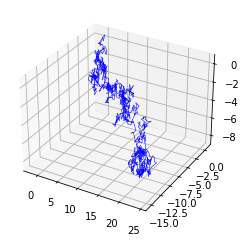

In [ ]:
# y=gen(1000,3)
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# for i in range(len(y)-1):
#     plt.plot([y[i][0], y[i+1][0]], [y[i][1], y[i+1][1]],[y[i][2],y[i+1][2]], color='blue',linewidth=0.5)

Part C

In [11]:
# to confirm in case of random walk RMS value is nearly equal to standard deviation
q=gen(1,1)[-1]
sum=0
for i in range(100000):
    q=np.vstack((q,gen(1,1)[-1]))
for w in q:
    sum+=w**2
print(np.std(q))
print((sum/len(q))**0.5)

0.28825677068667244
[0.2882571]


In [26]:
def lastpt(walks,number_of_steps):
    endpoints=np.empty(1)
    for i in range(walks):#number of walks
        endpoints=np.hstack((endpoints,gen(number_of_steps,1)[-1]))
    endpoints=endpoints[1:]
    return endpoints


In [28]:
def plothist(Walks,N):
    list=lastpt(Walks,N)
    binsize=100
    sd=list.std()
    mean=list.mean()
    plt.figure(figsize=(9,6))
    x=np.linspace(mean-4*sd,mean+4*sd)
    plt.plot(x, 8*sd*Walks*stat.norm.pdf(x, loc=mean, scale=sd)/binsize,c='r')
    plt.hist(list,bins=binsize,range=(mean-4*sd,mean+4*sd))
    plt.title(" For N={}".format(N))
    handles=[]
    handles.append(mpatches.Patch(color='r', label="Normal distribution"))
    handles.append(mpatches.Patch(color='b', label="Frequency"))
    plt.legend(handles=handles,loc='best')
    # shapiro_stat, shapiro_p_value = stat.shapiro(list)
    print(stat.anderson(list,'norm'))
    # print(shapiro_p_value)
    # print(a,b,c)
    plt.show()

In [43]:
from scipy.stats import norm
list=[1,2,5,10,100]
endpoints=[]
for i in list:
    endpoints=lastpt(10000,i)
    std=endpoints.std()
    count=0
    for j in endpoints:
        if(j>-3*std and j<3*std):
            count=count+1
    print("Percentage of points lying in (-3,3)standard deviation for stepsize ={} is {:.4f}%".format(i,count/100))

print("For normal distribution, the precentage is {}%".format(100*(norm.cdf(3,0,1)-norm.cdf(-3,0,1))))



Percentage of points lying in (-3,3)standard deviation for stepsize =1 is 100.0000%
Percentage of points lying in (-3,3)standard deviation for stepsize =2 is 100.0000%
Percentage of points lying in (-3,3)standard deviation for stepsize =5 is 99.9100%
Percentage of points lying in (-3,3)standard deviation for stepsize =10 is 99.7900%
Percentage of points lying in (-3,3)standard deviation for stepsize =100 is 99.6800%
For normal distribution, the precentage is 99.73002039367398%


AndersonResult(statistic=119.51897769329844, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.00030533245294088224, scale=0.2893475792100484)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


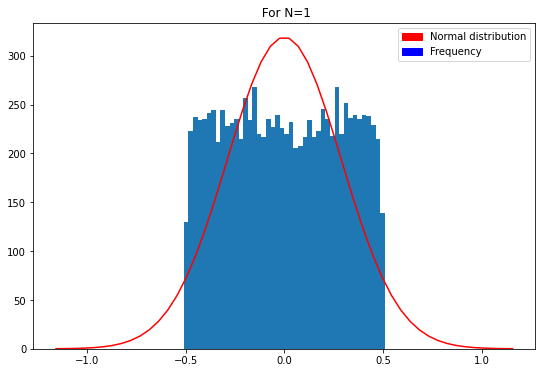

AndersonResult(statistic=12.424952714556639, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.0038744915434377283, scale=0.4129434067496575)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


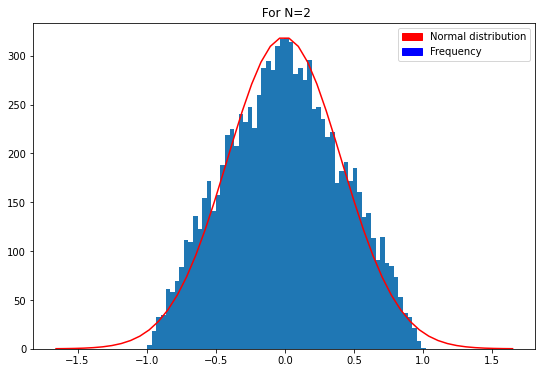

AndersonResult(statistic=1.0425607456072612, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.007548043183213843, scale=0.6432801171955371)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


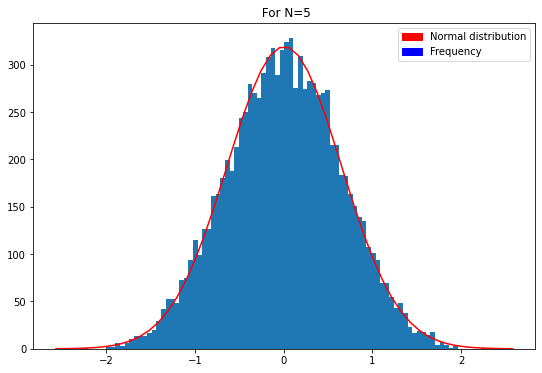

AndersonResult(statistic=0.7627715256348893, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.01017920659756612, scale=0.8998252469638568)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


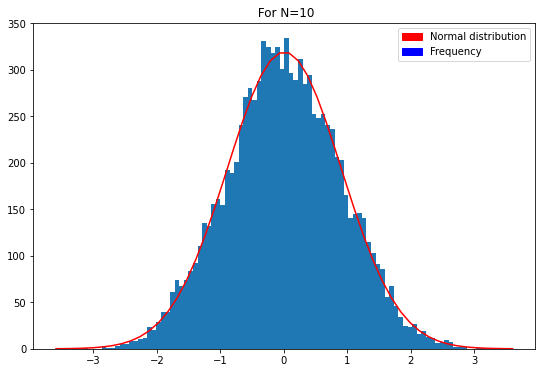

AndersonResult(statistic=0.21139748317364138, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.0007458046388956867, scale=1.288185971192282)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


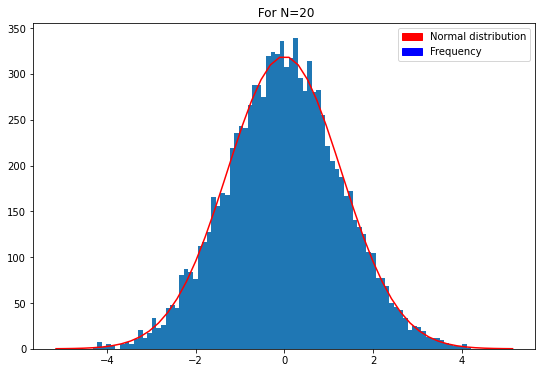

AndersonResult(statistic=0.34989149981083756, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.006687810072169637, scale=2.0196102200023653)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


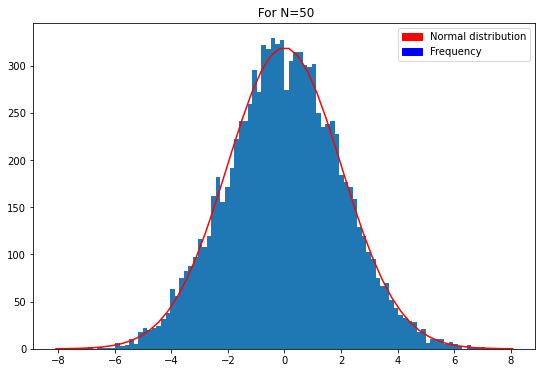

In [32]:
# Histogram plotting and Lower the anderson statistic better it follows a normal distribution 
plothist(10000,1)
plothist(10000,2)
plothist(10000,5)
plothist(10000,10)
plothist(10000,20)
plothist(10000,50)